# Polynomial Regression

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [ ]:
# taking 0 to 720 degrees value in radians in a variable
x = np.array([i*np.pi/180 for i in range(0,721,4)])

In [ ]:
# making a sin curve with random noise that is normally distributed with a standard deviation of 0.2 and mean of 0
np.random.seed(100)
y = np.sin(x) + np.random.normal(0, 0.2, len(x))

In [ ]:
# storing the above data points in a dataframe
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
data

,x,y
0,0.000000,-0.349953
1,0.069813,0.138293
2,0.139626,0.369780
3,0.209440,0.157424
4,0.279253,0.471902
...,...,...
176,12.287118,-0.171038
177,12.356931,-0.211181
178,12.426744,-0.222336
179,12.496557,-0.341457


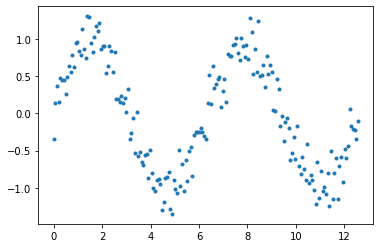

In [ ]:
# plotting the above data points
plt.figure(figsize = (6,4))
plt.plot(data['x'], data['y'], '.')

In [ ]:
# creating powers of x as columns
for i in range(2,16):  
    colname = 'x_%d'%i      
    data[colname] = data['x']**i
data

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.000000,-0.349953,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.069813,0.138293,0.004874,0.000340,0.000024,0.000002,1.157775e-07,8.082794e-09,5.642855e-10,3.939456e-11,2.750259e-12,1.920043e-13,1.340443e-14,9.358057e-16,6.533156e-17,4.561003e-18
2,0.139626,0.369780,0.019496,0.002722,0.000380,0.000053,7.409760e-06,1.034598e-06,1.444571e-07,2.017001e-08,2.816265e-09,3.932248e-10,5.490454e-11,7.666120e-12,1.070392e-12,1.494550e-13
3,0.209440,0.157424,0.043865,0.009187,0.001924,0.000403,8.440179e-05,1.767707e-05,3.702277e-06,7.754031e-07,1.624000e-07,3.401299e-08,7.123663e-09,1.491976e-09,3.124788e-10,6.544541e-11
4,0.279253,0.471902,0.077982,0.021777,0.006081,0.001698,4.742246e-04,1.324285e-04,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,12.287118,-0.171038,150.973267,1855.026338,22792.927386,280059.386859,3.441123e+06,4.228148e+07,5.195175e+08,6.383373e+09,7.843326e+10,9.637187e+11,1.184133e+13,1.454958e+14,1.787724e+15,2.196597e+16
177,12.356931,-0.211181,152.693746,1886.826103,23315.380163,288106.546338,3.560113e+06,4.399207e+07,5.436070e+08,6.717314e+09,8.300538e+10,1.025692e+12,1.267440e+13,1.566167e+14,1.935302e+15,2.391439e+16
178,12.426744,-0.222336,154.423973,1918.987225,23846.763516,296337.631984,3.682512e+06,4.576163e+07,5.686681e+08,7.066693e+09,8.781599e+10,1.091267e+12,1.356089e+13,1.685178e+14,2.094127e+15,2.602318e+16
179,12.496557,-0.341457,156.163948,1951.511746,24387.178642,304755.778802,3.808398e+06,4.759187e+07,5.947345e+08,7.432134e+09,9.287608e+10,1.160631e+12,1.450390e+13,1.812488e+14,2.264986e+15,2.830452e+16


In [ ]:
# creating a function of polynomial regression using the sklearn linear regression
def polynomial_regression(data, power):
    
    #initialize predictors:
    predictors = ['x']
    if power >= 2: predictors.extend(['x_%d'%i for i in range(2, power + 1)])
    
    #Fit the model
    linreg = LinearRegression(normalize = True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #plotting the curve
    plt.figure(figsize = (6,4))
    plt.plot(data['x'], y_pred)
    plt.plot(data['x'], data['y'], '.')
    plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [ ]:
#Initialize an empty dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index = ind, columns = col)
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

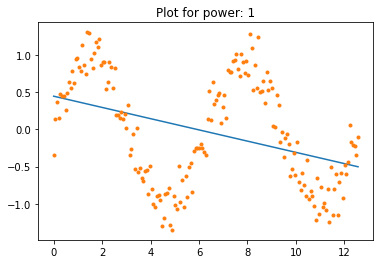

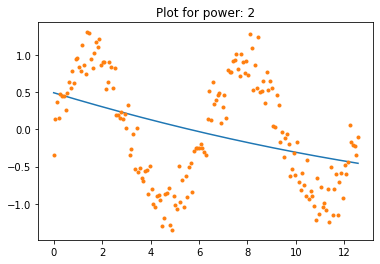

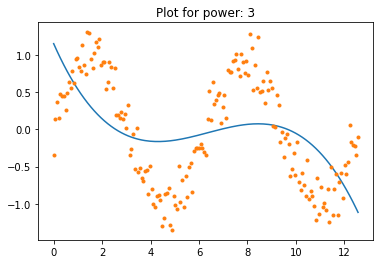

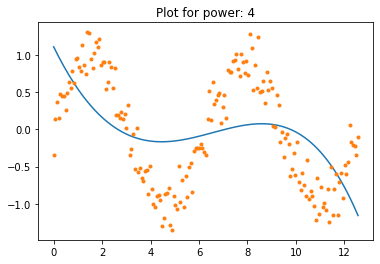

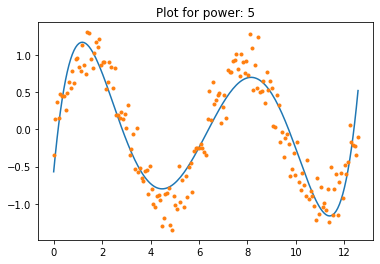

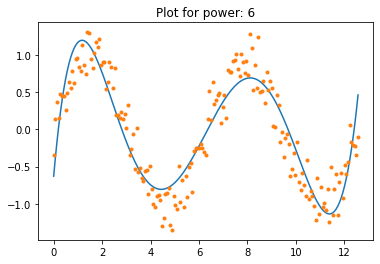

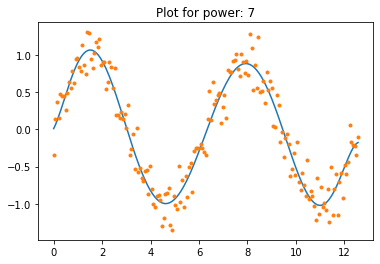

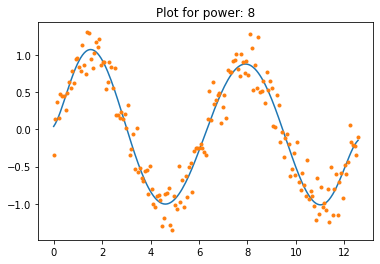

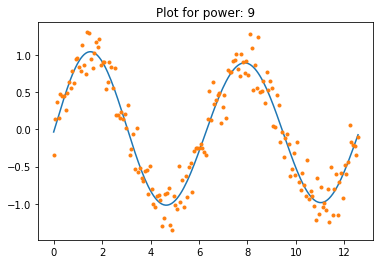

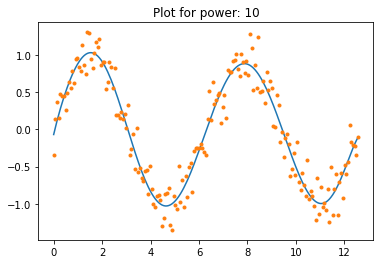

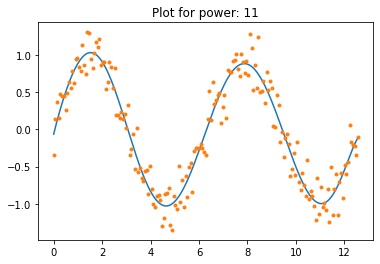

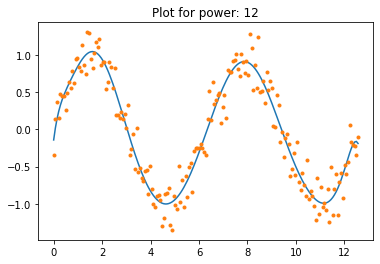

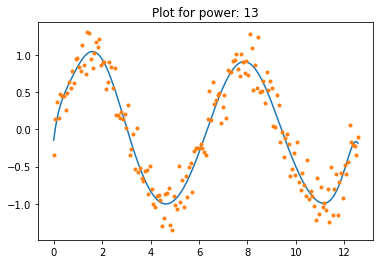

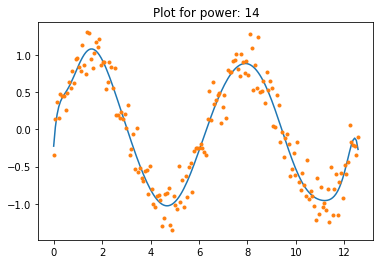

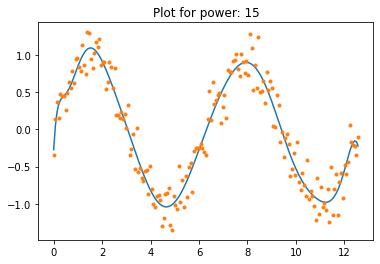

In [ ]:
#Iterate through all powers and assimilate results
for i in range(1,16): coef_matrix_simple.iloc[i-1, 0:i+2] = polynomial_regression(data, power = i)

In [ ]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,81.153445,0.447498,-0.075616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,81.071915,0.494175,-0.098027,0.001783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,69.011519,1.154858,-0.73781,0.129418,-0.006771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,68.970985,1.112377,-0.66847,0.104426,-0.003672,-0.000123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,14.002269,-0.56998,3.509721,-2.248833,0.497762,-0.045075,0.001431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,13.940374,-0.629349,3.719748,-2.418748,0.552218,-0.053225,0.002002,-0.000015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,7.196661,0.011054,0.63658,0.970001,-0.960868,0.279502,-0.036214,0.002183,-0.00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,7.182825,0.040599,0.449292,1.238766,-1.119827,0.327267,-0.04415,0.002921,-0.000086,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,7.094699,-0.034402,1.059998,0.128194,-0.280621,-0.001304,0.029445,-0.006869,0.000678,-0.000032,0.000001,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,7.07608,-0.068695,1.412005,-0.664327,0.463945,-0.368473,0.135356,-0.025676,0.00276,-0.000172,0.000006,-0.0,NaN,NaN,NaN,NaN,NaN


# Regularization in regression

## Ridge Regression

In [ ]:
# creating a function to perform ridge regression
def ridge_regression(data, predictors, alpha):
    
    #Fit the model
ridgereg = Ridge(alpha = alpha, normalize = True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #plotting the curve
    plt.figure(figsize = (6,4))
    plt.plot(data['x'], y_pred)
    plt.plot(data['x'], data['y'], '.')
    plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

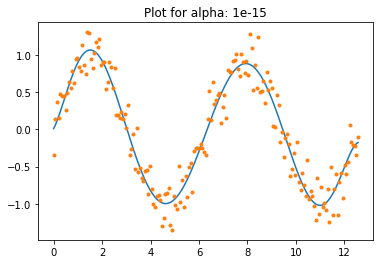

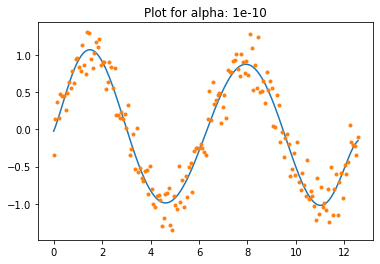

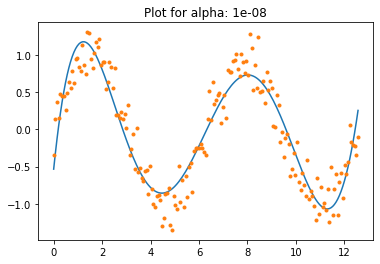

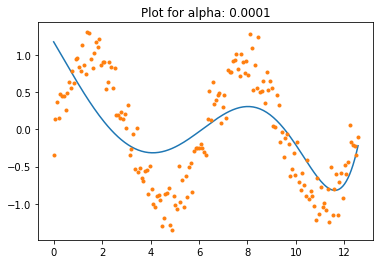

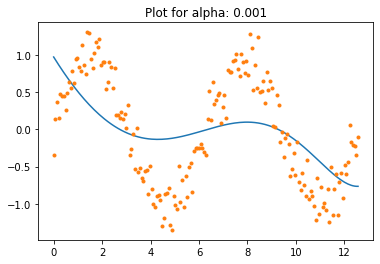

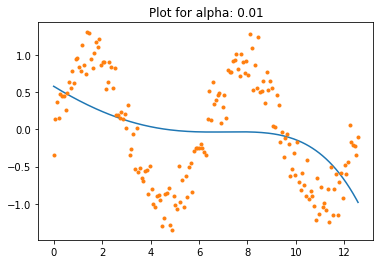

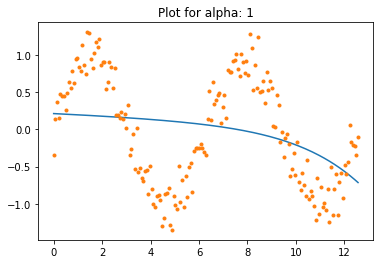

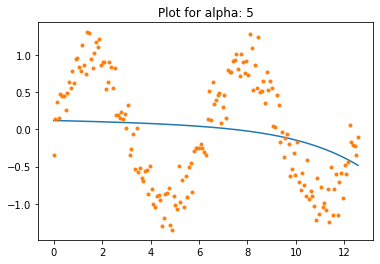

In [ ]:
import pandas as pd
#Initialize predictors 
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,8)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,8)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index = ind, columns = col)

for i in range(8): coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i])

In [ ]:
data[predictors]

,x,x_2,x_3,x_4,x_5,x_6,x_7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.069813,0.004874,0.000340,0.000024,0.000002,1.157775e-07,8.082794e-09
2,0.139626,0.019496,0.002722,0.000380,0.000053,7.409760e-06,1.034598e-06
3,0.209440,0.043865,0.009187,0.001924,0.000403,8.440179e-05,1.767707e-05
4,0.279253,0.077982,0.021777,0.006081,0.001698,4.742246e-04,1.324285e-04
...,...,...,...,...,...,...,...
176,12.287118,150.973267,1855.026338,22792.927386,280059.386859,3.441123e+06,4.228148e+07
177,12.356931,152.693746,1886.826103,23315.380163,288106.546338,3.560113e+06,4.399207e+07
178,12.426744,154.423973,1918.987225,23846.763516,296337.631984,3.682512e+06,4.576163e+07
179,12.496557,156.163948,1951.511746,24387.178642,304755.778802,3.808398e+06,4.759187e+07


In [ ]:
predictors

['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7']

In [ ]:
predictors

['x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7']

In [ ]:

#mycode
from sklearn.model_selection import train_test_split
X=bost.iloc[:,:-1]
Y=bost.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state=11)


lasso_reg=Lasso(alpha=0.034,max_iter=80,tol=0.2)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

ridge_reg=Ridge(alpha=50,max_iter=80,tol=0.2)
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)


plt.figure(figsize = (6,4))
plt.plot(bost['x'], y_pred)
plt.plot(data['x'], data['y'], '.')

NameError: ignored

In [ ]:
coef_matrix_ridge

## Lasso Regression

In [ ]:
# creating a function to perform lasso regression
def lasso_regression(data, predictors, alpha):
    
    #Fit the model
    lassoreg = Lasso(alpha = alpha, normalize = True)
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #plotting the curve
    plt.figure(figsize = (6,4))
    plt.plot(data['x'], y_pred)
    plt.plot(data['x'], data['y'], '.')
    plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
#Initialize predictors 
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,8)])

#Set the different values of alpha to be tested
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,8)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index = ind, columns = col)

for i in range(8): coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i])

In [ ]:
coef_matrix_lasso